## BM 336546 - HW2: Adi and Efrat

### Theory Questions-

##### Q1-
Model performance is more important evaluation metric than accuracy. 
Accuracy does not work well when there are unequal number of samples belonging to each class, which is the case in most datasets, classification accuracy can give us the false sense of achieving high accuracy resulting from imbalanced classes. Model performance is our way to know how good our model would be with new data. If the model accuracy is good and the performance is not, it means that our model can only work with the original training dataset. 
For example a cancer detection model. Let’s say out of 100, 90 of the patients don’t have cancer and the remaining 10 have it. Detecting everyone as not having cancer gives an accuracy of 90% but misses the patients that are sick and need treatment.

##### Q2-
The pros in using only BP and BMI features is that we are training a classifier with the most relevant features that can predict a heart attack, it is easier to visualize the data with less features and the computing time would be faster. The cons of this model is that we can miss relevant data by not using all of the features, thus compromising the model performance.
The pros in using all of the features is that we have more information for each patient and we could predict better whether a patient is going to suffer a heart attack or not. The cons of this classifier is that some of the features can be irrelevant or redundant, too many features can obstruct interpretability and be computationaly expensive.

##### Q3-
We would choose non-linear SVM. SVM works well with unstructured and semi-structured data like text and images, it is based on geometrical properties of the data and there is a lower risk of overfitting.
Non-linear SVM is helpful when the data cannot be easily separated with a linear line. We use Kernels to make non-separable data into separable data. 
## linear or non linear??????????????????

##### Q4- 
SVM tries to finds the best margin that separates the classes and thus reduces the risk of error on the data, while logistic regression can have different decision boundaries with different weights that are near the optimal point. LR works well with already identified independent variables and SVM with unstructured and semi-structured data. LR is based on statistical approaches while SVM is based on geometrical properties of the data. Moreover, LR is more vulnerable to overfitting than SVM.
Logistic regression does't have many hyperparameters to tune. We can improve performance by using different solvers or regularization (penalty). SVM provides larger number of hyperparameters to tune, like the choice of kernel that controls the projection of the variables, the penalty (C) that controls the trade-off between decision boundary and misclassification term and gamma which decides how much curvature we want in a decision boundary.

## Coding Assignment-

#### 1. Loading the data and preprocessing:

In [1]:
import pandas as pd 
import numpy as np
from pathlib import Path
import random
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
random.seed(10)
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss

In [2]:
file = Path.cwd().joinpath('HW2_data.csv') # concatenates HW2_data.csv to the current folder
T1D_dataset = pd.read_csv(file) # load the data
T1D_dataset = T1D_dataset.dropna() #removing patients with missing values
#section 4 - converting the data to one hot vector
T1D_dataset = pd.get_dummies(data=T1D_dataset,prefix=None, drop_first=True) #dummy coding - converting the data to binary
T1D_features = T1D_dataset[['Age','Gender_Male','Increased Urination_Yes','Increased Thirst_Yes','Sudden Weight Loss_Yes','Weakness_Yes','Increased Hunger_Yes',
                              'Genital Thrush_Yes','Visual Blurring_Yes','Itching_Yes','Irritability_Yes','Delayed Healing_Yes','Partial Paresis_Yes',
                              'Muscle Stiffness_Yes','Hair Loss_Yes','Obesity_Yes','Family History']]
diagnosis = T1D_dataset[['Diagnosis_Positive']]

In [2]:
#T1D_features = T1D_features.to_numpy()
#diagnosis = diagnosis.to_numpy()

#### 2. Train-test split:

In [3]:
x_train, x_test, y_train, y_test = train_test_split(T1D_features, np.ravel(diagnosis), test_size=0.2, random_state=0, stratify=np.ravel(diagnosis))

#### 3. Data visualization:

In [4]:
dic_train = {}
dic_test = {}
dic_delta = {}
units = []
for col in T1D_features.columns:        
    dic_train[col] = round(100 * sum(x_train[col])/len(x_train[col]),2)
    dic_test[col] = round(100 * sum(x_test[col])/len(x_test[col]),2)
    dic_delta[col] = dic_train[col] - dic_test[col]
    units.append('%')
dic_train['Age'] = round(sum(x_train['Age'])/len(x_train['Age']),2)
dic_test['Age'] = round(sum(x_test['Age'])/len(x_test['Age']),2)
dic_delta['Age'] = dic_train['Age'] - dic_test['Age']
units[0] = 'years'
table = pd.DataFrame(dic_train.items(), columns=['Feature','Train'])
df_test = pd.DataFrame(dic_test.items(), columns=['Feature','Test'])
df_delta = pd.DataFrame(dic_delta.items(), columns=['Feature','Delta'])
table['Test'] = df_test['Test']
table['Delta'] = df_delta['Delta']
table['units'] = units
print(table)

                    Feature  Train   Test  Delta  units
0                       Age  48.23  47.23   1.00  years
1               Gender_Male  63.40  61.90   1.50      %
2   Increased Urination_Yes  49.76  48.57   1.19      %
3      Increased Thirst_Yes  45.45  40.95   4.50      %
4    Sudden Weight Loss_Yes  40.91  43.81  -2.90      %
5              Weakness_Yes  58.37  59.05  -0.68      %
6      Increased Hunger_Yes  45.69  44.76   0.93      %
7        Genital Thrush_Yes  22.73  20.00   2.73      %
8       Visual Blurring_Yes  44.98  42.86   2.12      %
9               Itching_Yes  49.28  45.71   3.57      %
10         Irritability_Yes  25.12  20.95   4.17      %
11      Delayed Healing_Yes  47.37  40.00   7.37      %
12      Partial Paresis_Yes  42.58  43.81  -1.23      %
13     Muscle Stiffness_Yes  36.60  40.00  -3.40      %
14            Hair Loss_Yes  34.69  34.29   0.40      %
15              Obesity_Yes  15.79  20.95  -5.16      %
16           Family History  49.28  57.14  -7.86

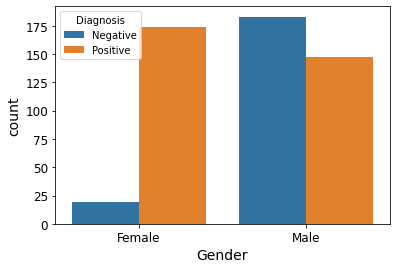

In [5]:
g = sns.countplot(x = 'Gender_Male', hue='Diagnosis_Positive',data = T1D_dataset)
g.set(xticklabels=['Female','Male'])
g.set(xlabel='Gender')
leg = g.get_legend()
leg.set_title("Diagnosis")
labs = leg.texts
labs[0].set_text("Negative")
labs[1].set_text("Positive")
plt.show()

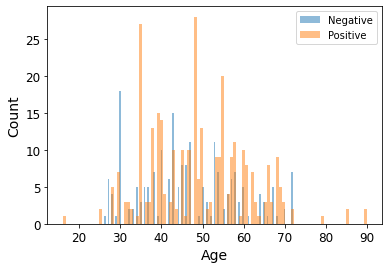

In [6]:
bins = 100
feat = 'Age'
idx_1 = (diagnosis == 0).index[(diagnosis == 0)['Diagnosis_Positive'] == True].tolist()
idx_2 = (diagnosis == 1).index[(diagnosis == 1)['Diagnosis_Positive'] == True].tolist()
plt.hist(T1D_features[feat].loc[idx_1], bins, alpha=0.5, label='Negative')
plt.hist(T1D_features[feat].loc[idx_2], bins, alpha=0.5, label='Positive')
plt.xlabel(feat)
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

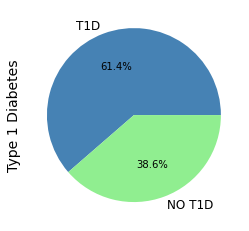

In [7]:
diagnosis.value_counts().plot(kind="pie", labels=['T1D','NO T1D'], colors = ['steelblue', 'lightgreen'], autopct='%1.1f%%', ylabel='Type 1 Diabetes') 
plt.show()

#### 5. Machine Learning Models:

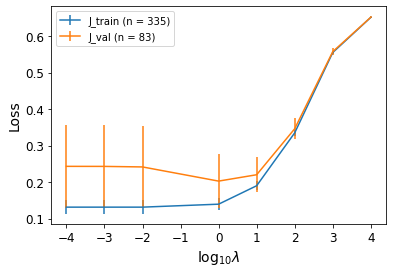

In [8]:
scaler = StandardScaler()

lmbda = np.array([0.0001, 0.001, 0.01, 1, 10, 100, 1000, 10000])
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)

J_train = np.zeros((2,len(lmbda)))
J_val = np.zeros((2,len(lmbda)))

for idx, lmb in enumerate(lmbda):
    C = 1/lmb
    log_reg = LogisticRegression(solver='saga', random_state=5, penalty='l2', C=C, max_iter=2000)
    h = 0 # index per split per lambda
    J_train_fold = np.zeros(n_splits)
    J_val_fold = np.zeros(n_splits)
    
    for train_index, val_index in skf.split(x_train, y_train):
        x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        x_train_fold = scaler.fit_transform(x_train_fold)
        x_val_fold = scaler.transform(x_val_fold)
        log_reg.fit(x_train_fold, y_train_fold)
        y_pred_train = log_reg.predict_proba(x_train_fold)
        J_train_fold[h] = log_loss(y_train_fold, y_pred_train)
        y_pred_val = log_reg.predict_proba(x_val_fold)
        J_val_fold[h] = log_loss(y_val_fold, y_pred_val)
        h += 1
        
    J_train[0, idx] = J_train_fold.mean()
    J_train[1, idx] = J_train_fold.std()
    J_val[0, idx] = J_val_fold.mean()
    J_val[1, idx] = J_val_fold.std()

plt.errorbar(np.log10(lmbda), J_train[0,:], yerr=J_train[1,:])
plt.errorbar(np.log10(lmbda), J_val[0,:], yerr=J_val[1,:]) 
plt.xlabel('$\log_{10}\lambda$')
plt.ylabel('Loss')
plt.legend(['J_train (n = ' + str(x_train_fold.shape[0]) + ')', 'J_val (n = ' + str(x_val_fold.shape[0]) + ')'])

In [28]:
def max_data_ratio(n_splits,x_train,y_train):
    data_ratio_orig = np.linspace(0.01,0.98,num=100) 
    k_min = 0
    m_x_train, _, m_y_train, _ = train_test_split(x_train, y_train, test_size =1-data_ratio_orig[k_min], random_state = 10,
                                     stratify=y_train)  
    while (m_x_train[m_y_train>0.5].shape[0] <= n_splits) or (m_x_train[m_y_train<0.5].shape[0] <= n_splits):
        k_min += 1
        m_x_train, _, m_y_train, _ = train_test_split(x_train, y_train, test_size =1-data_ratio_orig[k_min], random_state = 10,
                                 stratify=y_train)  
    k_max = 99
    m_x_train, _, m_y_train, _ = train_test_split(x_train, y_train, test_size =1-data_ratio_orig[k_max], random_state = 10,
                                     stratify=y_train)  
    while (m_x_train[m_y_train>0.5].shape[0] <= n_splits) or (m_x_train[m_y_train<0.5].shape[0] <= n_splits):
        k_max -= 1
        m_x_train, _, m_y_train, _ = train_test_split(x_train, y_train, test_size =1-data_ratio_orig[k_max], random_state = 10,
                                 stratify=y_train)
    return np.linspace(data_ratio_orig[k_min],data_ratio_orig[k_max],num=100)

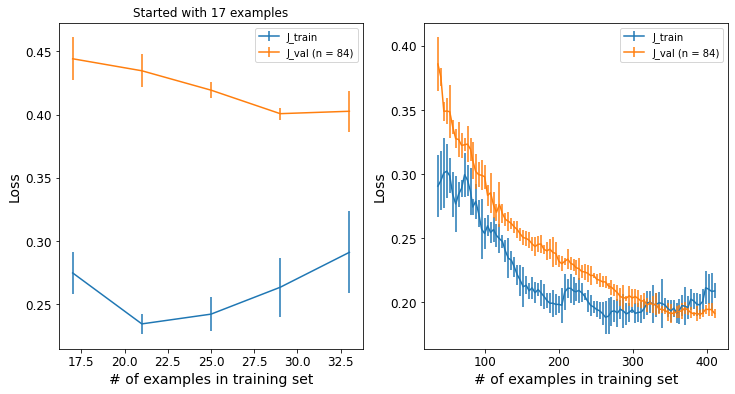

In [29]:
x_train_orig, x_val_orig, y_train_orig, y_val_orig= train_test_split(x_train, y_train, test_size = 0.20, random_state = 10, stratify=y_train)

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
data_ratio = max_data_ratio(n_splits, x_train, y_train)

J_train = np.zeros((2,len(data_ratio)))
J_val = np.zeros((2,len(data_ratio)))

for idx, curr_ratio in enumerate(data_ratio):
    C = 1/10
    log_reg = LogisticRegression(solver='saga', random_state=5, penalty='l2', C=C, max_iter=2000)
    h = 0 # index per split per lambda
    J_train_fold = np.zeros(n_splits)
    J_val_fold = np.zeros(n_splits)
    m_x_train, _, m_y_train, _ = train_test_split(x_train_orig, y_train_orig, test_size =1-curr_ratio, random_state = 10,
                                             stratify=y_train_orig)
    for train_index, val_index in skf.split(m_x_train, m_y_train):
        x_train_fold = m_x_train.iloc[train_index]
        y_train_fold = m_y_train[train_index]
        x_train_fold = scaler.fit_transform(x_train_fold)
        x_val = scaler.transform(x_val_orig)

        log_reg.fit(x_train_fold, y_train_fold)
        y_pred_train = log_reg.predict_proba(x_train_fold)
        J_train_fold[h] = log_loss(y_train_fold,y_pred_train)
        y_pred_val = log_reg.predict_proba(x_val)
        J_val_fold[h] = log_loss(y_val_orig,y_pred_val) 
        h += 1
        
        J_train[0, idx] = J_train_fold.mean()
        J_train[1, idx] = J_train_fold.std()
        J_val[0, idx] = J_val_fold.mean()
        J_val[1, idx] = J_val_fold.std()

fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0].errorbar(np.ceil(data_ratio[0:5]*x_train.shape[0]), J_train[0,0:5], yerr=J_train[1,0:5])
axes[0].errorbar(np.ceil(data_ratio[0:5]*x_train.shape[0]), J_val[0,0:5], yerr=J_val[1,0:5])
axes[0].set_xlabel('# of examples in training set')
axes[0].set_ylabel('Loss')
axes[0].legend(['J_train', 'J_val (n = ' + str(x_val.shape[0]) + ')'])
axes[0].set_title('Started with ' + str(int(np.ceil(data_ratio[0]*x_train.shape[0]))) + ' examples')
axes[1].errorbar(np.ceil(data_ratio[5:]*x_train.shape[0]), J_train[0,5:], yerr=J_train[1,5:])
axes[1].errorbar(np.ceil(data_ratio[5:]*x_train.shape[0]), J_val[0,5:], yerr=J_val[1,5:])
axes[1].set_xlabel('# of examples in training set')
axes[1].set_ylabel('Loss')
axes[1].legend(['J_train', 'J_val (n = ' + str(x_val.shape[0]) + ')'])

#### 6. Feature Selection:

#### 7. Data Separability Visualization: